## Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal lenght and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

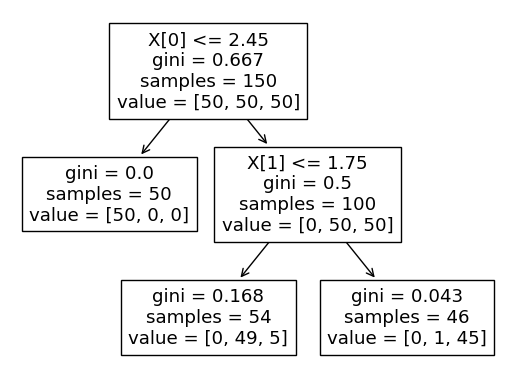

In [3]:
tree.plot_tree(tree_clf)

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

### Impurity measures

#### Gini impurity
$G_i = 1 - \sum \limits _{k=1} ^{m} P_{i, k}^2$

#### Entropy impurity
$H_i = - \sum \limits _{k = 1} ^{n} p_{i, k} \cdot log_{2}(p_{i,k})$

### CART Training Algorithm

#### CART cost function for classification 
$J(k, t_{k}) = \dfrac{m_{left}}{m}G_{left} + \dfrac{m_{right}}{m}G_{right}$

In [6]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.6, 0.5, 'X[1] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

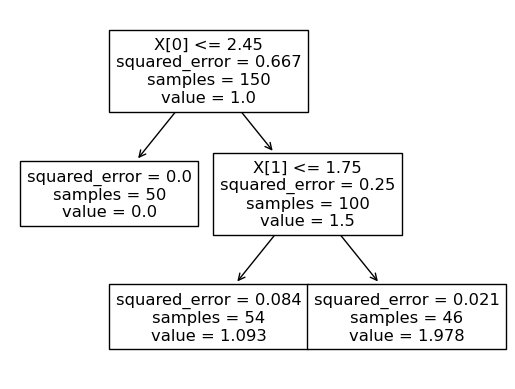

In [7]:
tree.plot_tree(tree_reg)

#### CART cost function for regression
$J(k, t_k) = \dfrac{m_{left}}{m}MSE_{left} + \dfrac{m_{right}}{m}MSE_{right}$

### Exercises

#### Question 1
R: I don't know, what is the number of classes? what is the number of features?
I think it depends mainly on these parameters than on the number of instances.

#### Question 2
R: As it seems from the chapter's examples, it's always lower. Since the idea is to split the data in a way that minimizes the impurity.

#### Question 3
Yes, decreasing the max_depth tends to regularize Decision Tree, preventing it from overfitting

#### Question 4
It doesn't seem that this will make any difference in the training. Since the spliting criterion doesn't depend on the feature's scale. they're not sensitive to the variance of the data.

#### Question 5
about 5 to 7 hours

#### Question 6
Probably not, that's alredy too much instances

#### Question 7

In [8]:
# a. Generate a moons dataset

from sklearn.datasets import make_moons

makeMoons = make_moons(n_samples=10000, noise=0.4)
X = makeMoons[0]
y = makeMoons[1]

In [9]:
# b. Split into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print(tree_clf._get_param_names())

['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']


In [12]:
# c. Tunning Hyperparameters
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {
    'max_depth': np.arange(1, 5),
    'max_leaf_nodes': np.arange(2, 400, 4),
    'min_samples_split': np.arange(2, 100, 2),
}

clf = GridSearchCV(tree_clf, parameters, n_jobs=3)
clf.fit(X_train, y_train)
GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, n_jobs=3)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_leaf_nodes',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [17]:
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=6)
{'max_depth': 2, 'max_leaf_nodes': 6, 'min_samples_split': 2}


In [18]:
# d. Training the selected model and measuring its accuracy in the test set

tree_clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=6)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.8488

### Score: $84.9\% \approx 85\%$  

#### Question 8

In [44]:
makeMoons = make_moons(n_samples=1000, noise=0.4)

X = makeMoons[0]
y = makeMoons[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=42)

In [45]:
# a. Split into 1000 subsets
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000,random_state=42, test_size=0.1)
for fold, (i, j) in enumerate(rs.split(X_train, y_train)):
    print("fold: ", fold)
    print("train indices: ", len(i))
    print("test indices: ", len(j))

fold:  0
train indices:  90
test indices:  10
fold:  1
train indices:  90
test indices:  10
fold:  2
train indices:  90
test indices:  10
fold:  3
train indices:  90
test indices:  10
fold:  4
train indices:  90
test indices:  10
fold:  5
train indices:  90
test indices:  10
fold:  6
train indices:  90
test indices:  10
fold:  7
train indices:  90
test indices:  10
fold:  8
train indices:  90
test indices:  10
fold:  9
train indices:  90
test indices:  10
fold:  10
train indices:  90
test indices:  10
fold:  11
train indices:  90
test indices:  10
fold:  12
train indices:  90
test indices:  10
fold:  13
train indices:  90
test indices:  10
fold:  14
train indices:  90
test indices:  10
fold:  15
train indices:  90
test indices:  10
fold:  16
train indices:  90
test indices:  10
fold:  17
train indices:  90
test indices:  10
fold:  18
train indices:  90
test indices:  10
fold:  19
train indices:  90
test indices:  10
fold:  20
train indices:  90
test indices:  10
fold:  21
train indices

In [46]:
# b. training one Decision Tree on each subset
Trees = []
for fold, (i, j) in enumerate(rs.split(X, y)):
    Trees.append(DecisionTreeClassifier(max_depth=2, max_leaf_nodes=6))
    Trees[fold].fit(X[i], y[i])
    score 
    print(f"score of tree {fold}: {Trees[fold].score(X[j], y[j])}")

score of tree 0: 0.83
score of tree 1: 0.85
score of tree 2: 0.89
score of tree 3: 0.87
score of tree 4: 0.81
score of tree 5: 0.85
score of tree 6: 0.85
score of tree 7: 0.83
score of tree 8: 0.86
score of tree 9: 0.93
score of tree 10: 0.85
score of tree 11: 0.86
score of tree 12: 0.83
score of tree 13: 0.86
score of tree 14: 0.81
score of tree 15: 0.8
score of tree 16: 0.88
score of tree 17: 0.84
score of tree 18: 0.86
score of tree 19: 0.79
score of tree 20: 0.83
score of tree 21: 0.75
score of tree 22: 0.88
score of tree 23: 0.87
score of tree 24: 0.77
score of tree 25: 0.88
score of tree 26: 0.89
score of tree 27: 0.86
score of tree 28: 0.91
score of tree 29: 0.85
score of tree 30: 0.89
score of tree 31: 0.81
score of tree 32: 0.78
score of tree 33: 0.84
score of tree 34: 0.86
score of tree 35: 0.88
score of tree 36: 0.85
score of tree 37: 0.82
score of tree 38: 0.88
score of tree 39: 0.85
score of tree 40: 0.86
score of tree 41: 0.86
score of tree 42: 0.87
score of tree 43: 0.88

score of tree 514: 0.86
score of tree 515: 0.84
score of tree 516: 0.87
score of tree 517: 0.78
score of tree 518: 0.85
score of tree 519: 0.82
score of tree 520: 0.83
score of tree 521: 0.85
score of tree 522: 0.86
score of tree 523: 0.9
score of tree 524: 0.84
score of tree 525: 0.83
score of tree 526: 0.89
score of tree 527: 0.78
score of tree 528: 0.84
score of tree 529: 0.81
score of tree 530: 0.82
score of tree 531: 0.84
score of tree 532: 0.87
score of tree 533: 0.81
score of tree 534: 0.87
score of tree 535: 0.83
score of tree 536: 0.82
score of tree 537: 0.8
score of tree 538: 0.81
score of tree 539: 0.85
score of tree 540: 0.84
score of tree 541: 0.84
score of tree 542: 0.81
score of tree 543: 0.81
score of tree 544: 0.8
score of tree 545: 0.87
score of tree 546: 0.89
score of tree 547: 0.87
score of tree 548: 0.9
score of tree 549: 0.81
score of tree 550: 0.82
score of tree 551: 0.86
score of tree 552: 0.83
score of tree 553: 0.83
score of tree 554: 0.84
score of tree 555: 0

In [49]:
# c. Predicting each instance on the test set.
from scipy import stats
import numpy as np

predictedMode = []
for i in range(len(X_test)):
    predicted = []
    for j in range(len(Trees)):
        predicted.append(Trees[j].predict([X_test[i]]))
    predictedMode.append(stats.mode(predicted, keepdims=False)[0][0])

print(predictedMode)

[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 

In [50]:
# d. Evaluating the accuracy score of the predictions
from sklearn.metrics import accuracy_score

accuracy_score(predictedMode, y_test)

0.8622222222222222

### Score: $86.2\% \approx 86\%$  